In [32]:
import sqlite3
conn = sqlite3.connect('TestDB.db')  
c = conn.cursor()

In [41]:
request = "CREATE TABLE table_new(name1 int, name2 int, name3 int)"
c.execute(request)
tables = c.fetchall()

In [44]:
c.execute("SELECT count(*) from table_new")
results = c.fetchall()
results[0][0]

1000

In [43]:
from random import randint
for i in range (1000):
    f1 = randint(0, 99)
    f2 = randint(0, 99)
    f3 = randint(0, 99)
    request = """INSERT INTO table_new
                          (name1, name2, name3)
                          VALUES
                          ({}, {}, {});""".format(f1,f2,f3)
    c.execute(request)
conn.commit()
print("Запись успешно вставлена в таблицу")
# c.close()

Запись успешно вставлена в таблицу


In [57]:
import psycopg2
import pandas as pd
import plotly.express as px

In [58]:
request = """
select * from table_new
"""


In [59]:
df = pd.read_sql_query(request,conn)
fig = px.bar(x=df.name1.to_list(), y=df.name2.to_list(), labels={'x':'name1', 'y':'name2'})
fig.show()

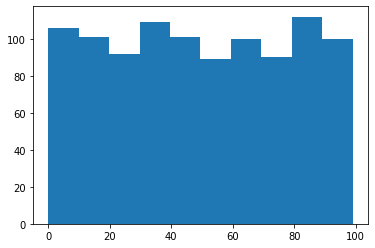

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(df['name1'])
plt.show()